<b>todo</b>
<ul>
<li>上市公司daily basic</li>
<li>上市公司balance sheet</li>
<li>上市公司balance sheet + price + 总股数 + 总市值</li>
<li>处理NULL空值</li>
<li>将数据划分为训练集和测试集</li>
<li>处理NaN值</li>
<li>处理NULL空值</li>
<li>特征缩放</li>
<li>应用算法</li>
</ul>

In [1]:
import pandas as pd
import os

# Build paths inside the project like this: os.path.join(BASE_DIR, ...)
BASE_DIR = os.path.abspath('..')
PROJ_ROOT = os.path.join(BASE_DIR, 'investtrack')
MODEL_PATH = os.path.join(BASE_DIR, 'diggings/model/')

FIN_DATA_PATH = os.path.join(BASE_DIR, 'diggings/data')

def load_fin_data(ts_code, fin_path=FIN_DATA_PATH):
    csv = os.path.join(fin_path, 'findata_' + ts_code + '.csv')
    return pd.read_csv(csv)

fin_data = load_fin_data('all')
fin_data.head()

,id,created_time,last_mod_time,ts_code,announce_date,end_date,eps,dt_eps,total_revenue_ps,revenue_ps,...,rd_exp,update_flag,company_id,pb,pe,pe_ttm,close,ps,ps_ttm,total_mv
0,170267,2022-03-01 21:39:35.259782+08,2022-03-01 21:39:35.259793+08,600654.SH,1991-07-29,1990-06-30,NaN,NaN,1.2383,1.2383,...,NaN,1,3104,42.0487,623.1571,1673.1489,NaN,20.9384,19.1352,106310.6000
1,169943,2022-03-01 21:39:29.132431+08,2022-03-01 21:39:29.132443+08,600651.SH,1991-07-29,1990-06-30,NaN,NaN,1.6050,1.6050,...,NaN,1,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
2,169941,2022-03-01 21:39:29.121229+08,2022-03-01 21:39:29.121244+08,600651.SH,1991-07-29,1991-06-30,NaN,NaN,3.4953,3.4953,...,NaN,0,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
3,165590,2022-03-01 21:38:12.785825+08,2022-03-01 21:38:12.785845+08,600602.SH,1991-07-29,1990-06-30,NaN,NaN,1.3155,1.3155,...,NaN,0,3060,3.2406,NaN,NaN,NaN,NaN,NaN,94400.0000
4,170157,2022-03-01 21:39:33.46794+08,2022-03-01 21:39:33.467953+08,600653.SH,1991-07-29,1991-06-30,NaN,NaN,0.9465,0.9465,...,NaN,0,3103,3.6163,273.2456,98.3714,NaN,3.1702,3.4486,3115.0000


In [2]:
fin_data = fin_data.drop(['id','created_time','last_mod_time'],axis=1)
fin_data.head()

,ts_code,announce_date,end_date,eps,dt_eps,total_revenue_ps,revenue_ps,capital_rese_ps,surplus_rese_ps,undist_profit_ps,...,rd_exp,update_flag,company_id,pb,pe,pe_ttm,close,ps,ps_ttm,total_mv
0,600654.SH,1991-07-29,1990-06-30,NaN,NaN,1.2383,1.2383,NaN,NaN,0.2207,...,NaN,1,3104,42.0487,623.1571,1673.1489,NaN,20.9384,19.1352,106310.6000
1,600651.SH,1991-07-29,1990-06-30,NaN,NaN,1.6050,1.6050,0.0039,NaN,0.2350,...,NaN,1,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
2,600651.SH,1991-07-29,1991-06-30,NaN,NaN,3.4953,3.4953,0.0039,NaN,0.3650,...,NaN,0,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
3,600602.SH,1991-07-29,1990-06-30,NaN,NaN,1.3155,1.3155,NaN,NaN,1.3741,...,NaN,0,3060,3.2406,NaN,NaN,NaN,NaN,NaN,94400.0000
4,600653.SH,1991-07-29,1991-06-30,NaN,NaN,0.9465,0.9465,0.6651,NaN,0.0577,...,NaN,0,3103,3.6163,273.2456,98.3714,NaN,3.1702,3.4486,3115.0000


In [3]:
import math
import matplotlib.pyplot as plt

fin_data_lte120b = fin_data[fin_data['total_mv']<12000000].copy()
fin_data_lte120b = fin_data_lte120b[fin_data_lte120b['tangible_asset']< 1.5 * math.pow(10, 11)].copy()
fin_data_lte120b = fin_data_lte120b[fin_data_lte120b['tangible_asset']> -0.35 * math.pow(10, 11)].copy()
fin_data_lte120b['tangible_asset'].describe()


count    1.539470e+05
mean     2.550647e+09
std      5.628574e+09
min     -3.272775e+10
25%      5.582283e+08
50%      1.101216e+09
75%      2.345372e+09
max      1.156236e+11
Name: tangible_asset, dtype: float64

In [12]:
fin_data_lte120b = fin_data_lte120b.drop(['ts_code','announce_date','end_date'],axis=1)
fin_data_lte120b.head()

,eps,dt_eps,total_revenue_ps,revenue_ps,capital_rese_ps,surplus_rese_ps,undist_profit_ps,extra_item,profit_dedt,gross_margin,...,rd_exp,update_flag,company_id,pb,pe,pe_ttm,close,ps,ps_ttm,total_mv
0,NaN,NaN,1.2383,1.2383,NaN,NaN,0.2207,NaN,NaN,1716264.20,...,NaN,1,3104,42.0487,623.1571,1673.1489,NaN,20.9384,19.1352,106310.6000
1,NaN,NaN,1.6050,1.6050,0.0039,NaN,0.2350,NaN,NaN,528446.72,...,NaN,1,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
2,NaN,NaN,3.4953,3.4953,0.0039,NaN,0.3650,NaN,NaN,1327279.41,...,NaN,0,3101,7.4072,NaN,28.3600,NaN,NaN,1.2657,1669.9566
3,NaN,NaN,1.3155,1.3155,NaN,NaN,1.3741,NaN,NaN,81943000.00,...,NaN,0,3060,3.2406,NaN,NaN,NaN,NaN,NaN,94400.0000
4,NaN,NaN,0.9465,0.9465,0.6651,NaN,0.0577,NaN,NaN,463493.41,...,NaN,0,3103,3.6163,273.2456,98.3714,NaN,3.1702,3.4486,3115.0000


<AxesSubplot:xlabel='tangible_asset', ylabel='total_mv'>

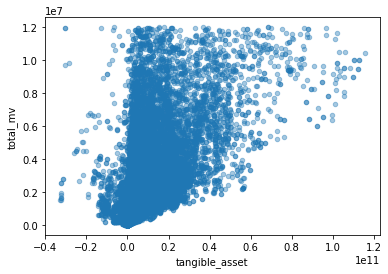

In [4]:
fin_data_lte120b.plot(kind='scatter', x='tangible_asset', y='total_mv', alpha=0.4)

In [5]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [13]:
train_set,test_set = split_train_test(fin_data_lte120b, 0.2)

In [ ]:
# tangible_set = train_set.d
# train_set.describe()

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(train_set)
imputer.statistics_

array([ 1.40000000e-01,  1.40000000e-01,  1.95075000e+00,  1.94715000e+00,
        1.45390000e+00,  1.82500000e-01,  8.71000000e-01,  4.48670630e+06,
        3.72016468e+07,  1.74314674e+08,  1.62370000e+00,  1.18100000e+00,
        9.68100000e-01,  1.01339900e+02,  6.55093500e+01,  2.05380000e+00,
        3.28885000e+00,  5.54800000e-01,  1.71140000e+00,  2.94200000e-01,
        4.03538140e+07,  2.74154705e+06,  7.53506853e+06,  3.25648876e+07,
        7.00491382e+07,  1.19046128e+08, -4.70330017e+07, -2.26798245e+07,
        4.33501513e+08,  2.90935318e+07,  3.55056940e+08,  6.00734932e+07,
        1.09984487e+09,  4.53884903e+08,  3.75079268e+08,  1.90329711e+09,
        3.56961598e+08,  1.31500000e-01,  3.61355000e+00,  8.29000000e-02,
        1.07975000e+00, -2.56000000e-02,  2.08400000e-01, -1.39500000e-01,
       -6.78000000e-02,  6.98420000e+00,  2.52060000e+01,  7.47940000e+01,
        1.58834000e+01,  6.98000000e+00,  4.19305000e+00,  8.65735000e+00,
        1.03370000e+00,  

In [15]:
train_set.median().values

array([ 1.40000000e-01,  1.40000000e-01,  1.95075000e+00,  1.94715000e+00,
        1.45390000e+00,  1.82500000e-01,  8.71000000e-01,  4.48670630e+06,
        3.72016468e+07,  1.74314674e+08,  1.62370000e+00,  1.18100000e+00,
        9.68100000e-01,  1.01339900e+02,  6.55093500e+01,  2.05380000e+00,
        3.28885000e+00,  5.54800000e-01,  1.71140000e+00,  2.94200000e-01,
        4.03538140e+07,  2.74154705e+06,  7.53506853e+06,  3.25648876e+07,
        7.00491382e+07,  1.19046128e+08, -4.70330017e+07, -2.26798245e+07,
        4.33501513e+08,  2.90935318e+07,  3.55056940e+08,  6.00734932e+07,
        1.09984487e+09,  4.53884903e+08,  3.75079268e+08,  1.90329711e+09,
        3.56961598e+08,  1.31500000e-01,  3.61355000e+00,  8.29000000e-02,
        1.07975000e+00, -2.56000000e-02,  2.08400000e-01, -1.39500000e-01,
       -6.78000000e-02,  6.98420000e+00,  2.52060000e+01,  7.47940000e+01,
        1.58834000e+01,  6.98000000e+00,  4.19305000e+00,  8.65735000e+00,
        1.03370000e+00,  

In [16]:
X = imputer.transform(train_set)
train_set_tr = pd.DataFrame(X,columns=train_set.columns,index=train_set.index)

In [17]:
train_set = train_set_tr.drop('total_mv', axis=1)
train_set_labels = train_set_tr['total_mv'].copy()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    # ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

train_set_tr = num_pipeline.fit_transform(train_set)


In [22]:
train_set_tr

array([[-0.84594086, -0.89148953, -0.0296747 , ..., -0.00215155,
        -0.00650986, -0.00285038],
       [ 0.24033425,  0.26958021, -0.03891503, ..., -0.00215155,
        -0.01224253, -0.00285071],
       [ 1.45697009,  1.56998657,  0.09932438, ..., -0.00215155,
        -0.0172001 , -0.00285111],
       ...,
       [-0.34262503, -0.33908994, -0.04191647, ..., -0.00215155,
        -0.01248196, -0.00285073],
       [ 0.56372913,  0.6152422 , -0.03002102, ..., -0.00215155,
         0.00533287, -0.00284921],
       [ 1.39294677,  1.50155498,  0.02170765, ..., -0.00215155,
        -0.01288484, -0.00285077]])

In [23]:
train_set_labels

166933    8.467530e+05
152066    1.453836e+06
124037    7.539491e+06
189925    1.011021e+06
37030     5.174742e+05
              ...     
24939     1.166968e+05
9774      2.577600e+05
39450     1.489901e+05
125974    1.505049e+06
149701    2.323968e+06
Name: total_mv, Length: 123158, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_tr, train_set_labels)

LinearRegression()

In [32]:
train_set_tr.shape

(123158, 171)

In [34]:
train_set_labels.shape
train_set_labels.head()

166933    8.467530e+05
152066    1.453836e+06
124037    7.539491e+06
189925    1.011021e+06
37030     5.174742e+05
Name: total_mv, dtype: float64

In [25]:
some_data = train_set.iloc[:5]
some_labels = train_set_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data))

Predictions: [ 433679.20094975 1786825.14633192 3368972.43437588 2012630.59294711
  383436.97538188]


In [26]:
print("Labels:", list(some_labels))

Labels: [846753.0099, 1453835.9127, 7539490.6789, 1011021.0456, 517474.2351]


In [31]:
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [35]:
lin_preds = lin_reg.predict(some_data_prepared)
lin_rmse = root_mean_squared_error(some_labels, lin_preds)
lin_rmse

1933697.0756348365

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

lin_mae = mean_absolute_error(some_labels, lin_preds)
lin_mae

1210445.6188343032

In [37]:
from sklearn.metrics import mean_squared_error
total_mv_predict = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(some_labels, total_mv_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1933697.0756348365

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_set_tr, train_set_labels)

RandomForestRegressor()

In [29]:
print('Predictions:', forest_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [ 822157.574911 1545807.419765 7658472.454264 1036346.809265
  392989.619494]
Labels: [846753.0099, 1453835.9127, 7539490.6789, 1011021.0456, 517474.2351]


In [38]:
forest_pred = forest_reg.predict(some_data_prepared)
lin_mae = mean_absolute_error(some_labels, forest_pred)
lin_mae

77071.81933779946

In [39]:
import joblib

joblib.dump(forest_reg, MODEL_PATH + 'rand_forest_model1.pkl')

['/Users/hanjie/Documents/GitHub/investtrack/diggings/model/rand_forest_model1.pkl']

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    estimator=forest_reg,
    X=some_data_prepared,
    y=some_labels,
    scoring='neg_mean_squared_error',
    cv=5)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

array([1422209.457577,  566198.420919, 6498604.826716, 1471574.017562,
       1612315.065731])

In [42]:
def display_scores(scores):
    print("Scores:\n", scores)
    print("\nMean:", scores.mean())
    print("\nStandard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores:
 [1422209.457577  566198.420919 6498604.826716 1471574.017562
 1612315.065731]

Mean: 2314180.3577010008

Standard deviation: 2124291.006778036


In [43]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(train_set_tr, train_set_labels)
svm_preds = svm_reg.predict(some_data_prepared)
root_mean_squared_error(some_labels, svm_preds)

2830797.934370491

In [44]:
print('Predictions:', svm_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 342183.24178868  670494.63314843 1280289.48384734 1000145.72675148
  372034.7551399 ]
Labels: [846753.0099, 1453835.9127, 7539490.6789, 1011021.0456, 517474.2351]
